In [1]:
from datetime import datetime
from getpass import getpass

admin_rdm_url = 'https://admin.staging.rdm.nii.ac.jp/' #'https://admin.staging.rdm.example.com/'

idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000

In [2]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

(7, 16)

# 定期監視-管理者-機関ストレージのクォータ

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)


## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [3]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmp8z6o2tzb'

In [4]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20251031-103704', '/tmp/tmp1wfzwx7c')

Start epoch: 1761907024.446089 seconds


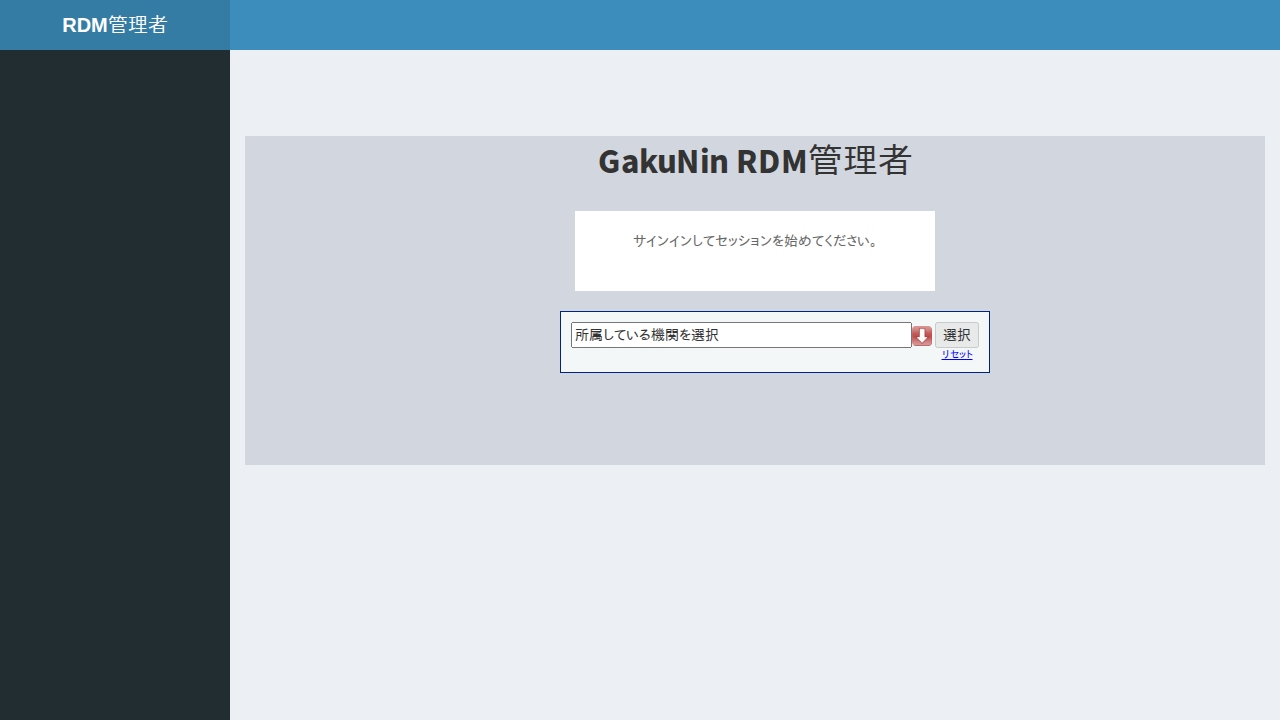

In [5]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1761907026.9996812 seconds
ierae08
YibkH0U9-3^%Z@v8


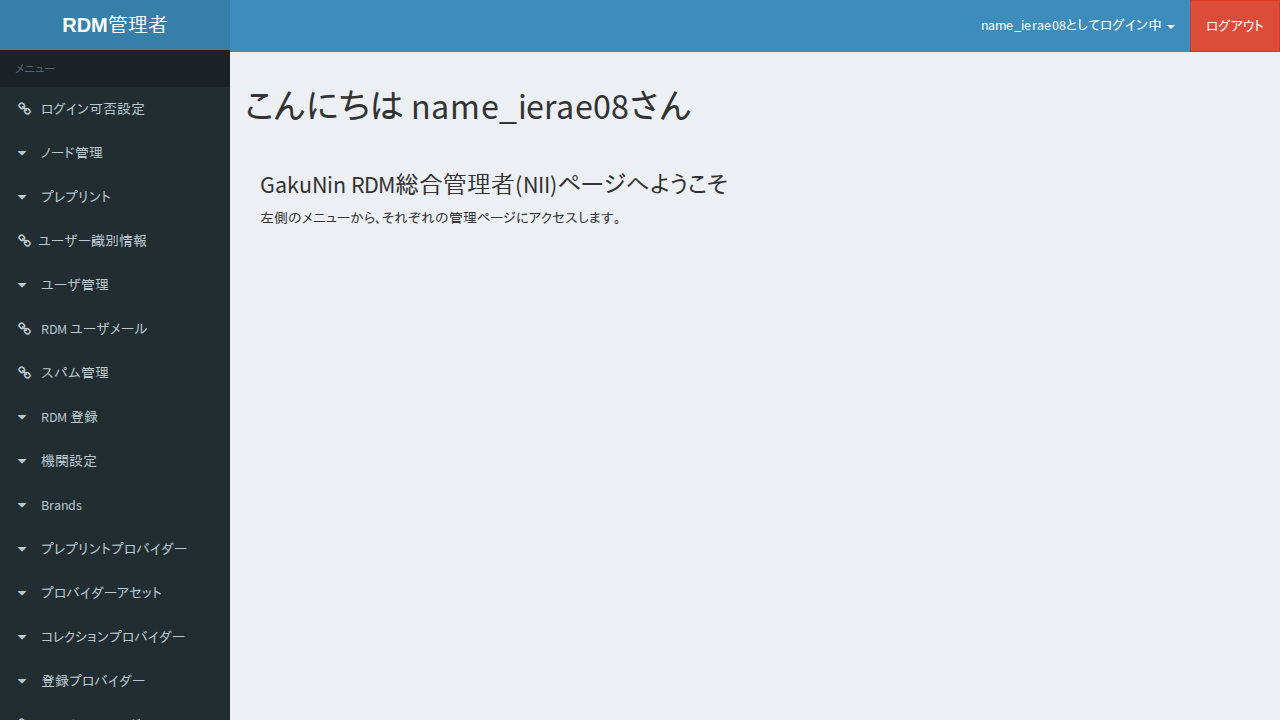

In [6]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「機関ストレージのクォータ」を選択する

「機関のリスト」が表示される

Start epoch: 1761907034.1391003 seconds


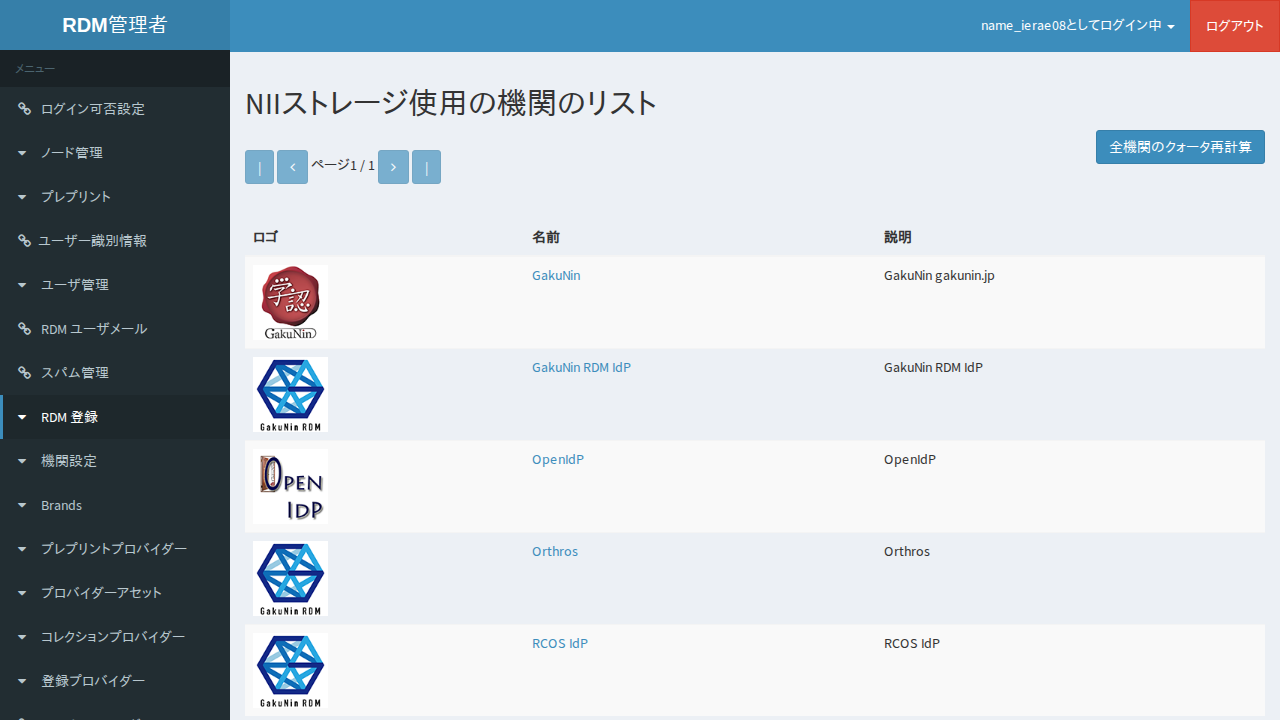

In [7]:
async def _step(page):
    await page.locator('//a[@href = "/institutional_storage_quota_control/"]').click()

    await expect(page.locator('//h2[text() = "機関ストレージ"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [21]:
await finish_pw_context()

Video: result/result-20251031-094222/取りまとめ-管理者機能/notebooks/テスト手順-管理者機能-NIIストレージのクォータ/video-1.webm
HAR: result/result-20251031-094222/取りまとめ-管理者機能/notebooks/テスト手順-管理者機能-NIIストレージのクォータ/har.zip


スクリーンキャプチャ動画の取得に失敗しました。
Traceback (most recent call last):
  File "/home/jovyan/scripts/playwright.py", line 168, in _finish_pw_context
    shutil.copyfile(video_path, dest_video_path)
  File "/opt/conda/lib/python3.12/shutil.py", line 260, in copyfile
    with open(src, 'rb') as fsrc:
         ^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmp1wfzwx7c/videos/9222ed2bb3fd172e1b06e79c29057704.webm'


In [22]:
!rm -fr {work_dir}